# UMAP visualization

In [ ]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

# Optional for interactive plots:
import plotly.express as px


In [ ]:
# Load your labeled dataset
df_work = pd.read_csv("amazon_reviews_with_final_labels.csv")

In [ ]:
# load precomputed embeddings.
data = np.load("amazon_embeddings_3k.npz", allow_pickle=True)
embeddings = data['embeddings']
user_ids = data['user_id']

In [ ]:
# Run UMAP for 2D projection
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

df_work['umap_x'] = umap_embeddings[:, 0]
df_work['umap_y'] = umap_embeddings[:, 1]

c:\Users\Lucy\OneDrive\Documents\GitHub\amazon_topic_analysis\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


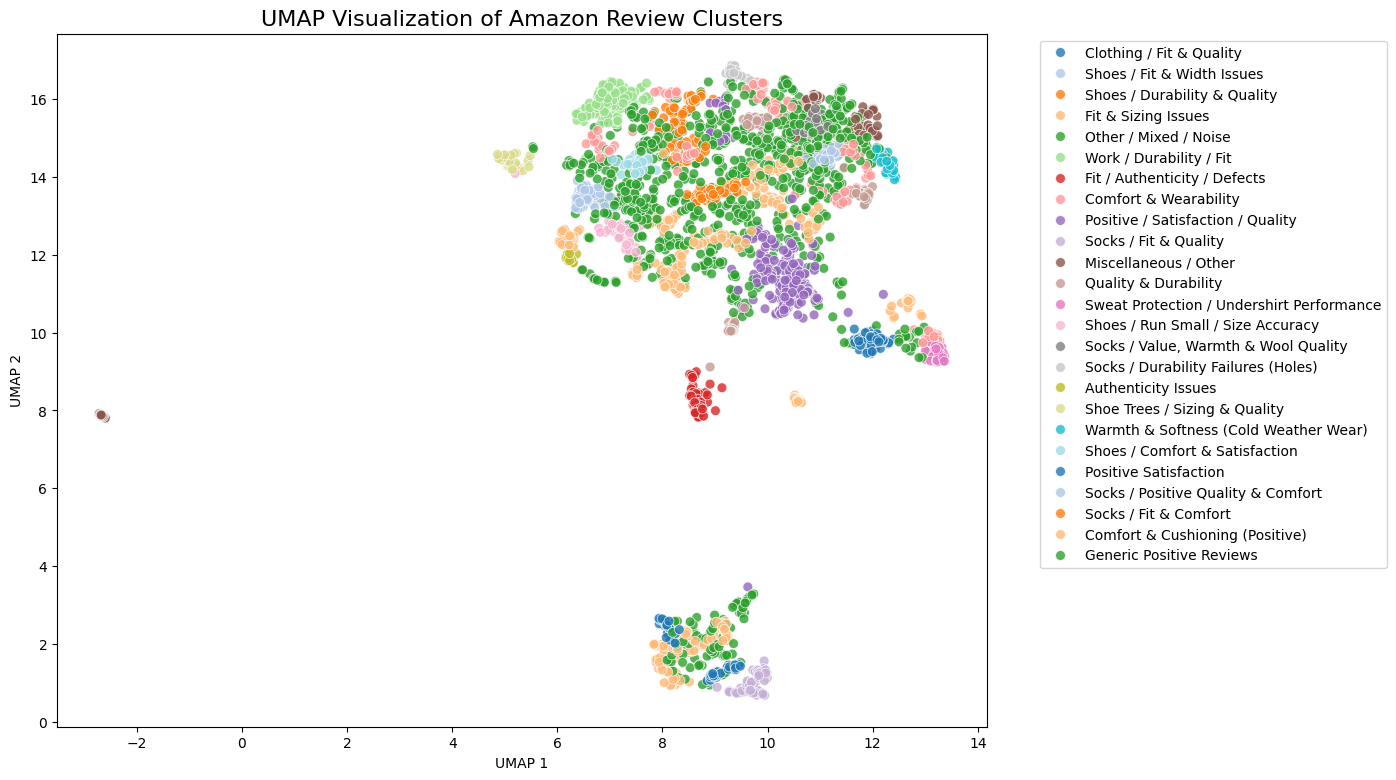

In [9]:
# Plot using Matplotlib/Seaborn

plt.figure(figsize=(12, 9))
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='label',
    palette="tab20",
    data=df_work,
    legend='full',
    s=50,
    alpha=0.8
)
plt.title("UMAP Visualization of Amazon Review Clusters", fontsize=16)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Optional: Interactive Plot with Plotly
# This allows you to hover over points to see the actual review text, which is great for presentations or deeper exploration.

fig = px.scatter(
    df_work,
    x='umap_x',
    y='umap_y',
    color='label',
    hover_data=['doc', 'cluster'],
    title="Interactive UMAP of Amazon Review Clusters"
)
fig.show()



In [ ]:
# Optional: Cluster Summary Table
# This quickly shows the size of each labeled cluster alongside the visualization.

df_work.groupby('label').size().sort_values(ascending=False)


label
Other / Mixed / Noise                        918
Fit & Sizing Issues                          379
Positive / Satisfaction / Quality            215
Comfort & Wearability                        159
Work / Durability / Fit                      155
Quality & Durability                         103
Miscellaneous / Other                         95
Fit / Authenticity / Defects                  86
Socks / Fit & Quality                         76
Shoes / Durability & Quality                  75
Shoes / Fit & Width Issues                    73
Clothing / Fit & Quality                      68
Positive Satisfaction                         64
Shoes / Comfort & Satisfaction                58
Sweat Protection / Undershirt Performance     56
Socks / Fit & Comfort                         56
Shoe Trees / Sizing & Quality                 54
Shoes / Run Small / Size Accuracy             52
Socks / Value, Warmth & Wool Quality          42
Comfort & Cushioning (Positive)               42
Socks / Positi